In [3]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

The following lines need to be used if data the from downloaded dataset should be used. The location of the ``Data`` folder needs to be specified by the parameter ``DATA_FOLDER_PATH`` in the file ``input_params.json``. 

If you want to analyse your own dataset you need to set the variable ``file_path`` to the folder where the simulation is located. Importantly, in this folder there should only be located exactly one simulation.

In [34]:
file_path_input_params_json = '../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'fig_2/homogeneous_low'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path path_to_folder_containing_the_downloaded_simulation_data/Data/fig_2/homogeneous_low
parameter_path path_to_folder_containing_the_downloaded_simulation_data/Data/fig_2/homogeneous_low/parameter_set.csv


# Make data frame from time traces

In [30]:
data_frame = makeDataframe.make_dataframe(file_path)
time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_init_events')
v_init = v_init_data_frame.iloc[-1]['v_init_per_ori']
t_init_list = v_init_data_frame['t_init'].to_numpy()
print(t_init_list)

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_div_events')

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_2/homogeneous_low/Fig_2A.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_2/homogeneous_low/low_homogeneous']
[ 3.088  4.944  6.877  8.846 10.832 12.826 14.824 16.823 18.822 20.822
 22.823 24.823 26.823 28.824 30.824 32.824 34.825 36.825 38.825]


In [31]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
n_p = np.array(time_traces_data_frame["N_init"])
n_s = np.array(time_traces_data_frame["sites_total"])
total_conc = n_p / volume
free_conc = np.array(time_traces_data_frame["free_conc"])
print(time.size)
t_0 = time[volume==v_d_data_frame['v_b'][5]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][8]]
indx_f = np.where(time==t_f)[0][0]+200

print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
n_ori_density_cut = n_ori_cut / volume_cut
n_p_cut = n_p[indx_0:indx_f]
n_s_cut = n_s[indx_0:indx_f]
total_conc_cut = total_conc[indx_0:indx_f]
free_conc_cut = free_conc[indx_0:indx_f]
t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]

print(t_init_list_cut)

40000
13828 20024
[14.824 16.823 18.822]


# Color definitions

In [32]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)
dark_yellow = (235 / 255, 201 / 255, 27 / 255)

# Plot three figures

2.0 13.828 16.713390081777927


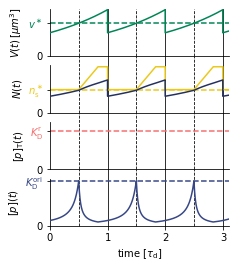

In [33]:
label_list = [r'$V(t) \, [\mu m^3]$', r'$N(t)$', r'$[p]_{\rm T}(t)$', r'$[p](t)$']
x_axes_list = [time_cut, time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, n_p_cut, total_conc_cut, free_conc_cut]
color_list = [green, dark_blue, pinkish_red, blue]
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[0]['doubling_rate']
fig, ax = plt.subplots(4, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
for item in range(0, len(label_list)):
    if item == 1:
        ax[item].plot(time_cut, n_s_cut, color=dark_yellow, zorder=2)
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item], zorder=3)
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in np.arange(1,4):
        ax[item].axvline(x=time_cut[0] + t_div * doubling_time, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)
ax[0].set_yticks([0,v_init])
ax[0].set_yticklabels(['0', r'$v^\ast$'])
ax[0].get_yticklabels()[1].set_color(color_list[0])
# ax[0].tick_params(axis='y', colors=green)
ax[0].axhline(y=v_init, color=green, linestyle='--', label=r'$v^\ast$')
# ax[0].axhline(y=2*v_init, color=green, linestyle='--')


ax[1].set_yticks([0,data_frame.iloc[0]['n_c_max_0']])
ax[1].set_yticklabels(['0', r'$n_{\rm s}^\ast$'])
ax[1].get_yticklabels()[1].set_color(dark_yellow)
ax[1].axhline(y=[data_frame.iloc[0]['n_c_max_0']], color=dark_yellow, linestyle='--')

ax[2].axhline(y=data_frame.iloc[0]['michaelis_const_regulator'], color=pinkish_red, linestyle='--')
ax[2].set_yticks([0, data_frame.iloc[0]['michaelis_const_regulator']])
ax[2].set_yticklabels([0, r'$K_{\rm D}^{\rm r}$'])
ax[2].get_yticklabels()[1].set_color(color_list[2])
ax[2].set(ylim=(0,data_frame.iloc[0]['michaelis_const_regulator']*1.25))

ax[3].axhline(y=data_frame.iloc[0]['critical_free_conc'], color=color_list[3], linestyle='--')
ax[3].set_yticks([0, data_frame.iloc[0]['critical_free_conc']])
ax[3].set_yticklabels(['0', r'$K_{\rm D}^{\rm ori}$'])
ax[3].get_yticklabels()[1].set_color(color_list[3])
ax[3].tick_params(bottom=True, labelbottom=True)
ax[3].tick_params(axis='x', colors='black')

ax[3].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time, 
                  time_cut[0]+ 3*doubling_time])
ax[3].set_xticklabels(['0', '1', '2', '3'])
ax[3].margins(0)
ax[3].tick_params(     # ticks along the bottom edge are off
    bottom=True,         # ticks along the top edge are off
    labelbottom=True)

print(doubling_time, time_cut[0], time_cut[0]+ doubling_time / np.log(2))
plt.savefig(file_path + '/Fig_2A.pdf', format='pdf',bbox_inches='tight')